In [0]:
from pandas_datareader import data as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
start_date = '2000-01-01'
end_date = '2019-01-05'

In [0]:
def getTicks(items):
  symbols = []
  for i in items: 
    try:
      data = dr.get_data_yahoo(i, start_date, end_date)
    except Exception as e:
      print("there was a problem with {}".format(i))
    else:
      symbols.append(i)
  return symbols

In [0]:
sample_ticks = [
            'NVS'                
]

In [0]:
adj = getTicks(sample_ticks)

In [0]:
df = dr.get_data_yahoo(adj, start_date, end_date)
prices = df.loc[:,('Adj Close',slice(None))]

In [0]:
prices.columns = prices.columns.droplevel(0)

In [0]:
from statsmodels.tsa.stattools import pacf,acf

In [0]:
p = prices.copy()

Text(0.5, 1.0, 'Stock Price')

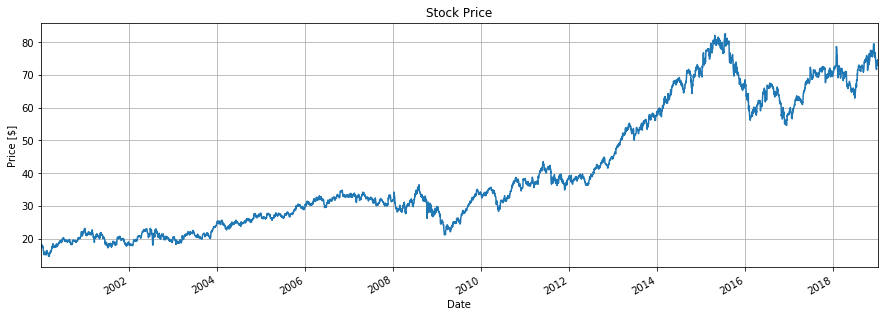

In [11]:
plt.figure(figsize=(15,5))
p.NVS.plot(grid=True)
plt.ylabel('Price [$]')
plt.title('Stock Price')

In [0]:
from statsmodels.graphics import tsaplots

The Following Graphs Below explore the AutoCorrelation and Partial AutoCorrelation Test Method at different lags, which in this case the former tells us that each of the 30 lag variables are statistically significant and there exists significant correlation between lags and the original time series.
Remember=> Positive Lags mean Stickiness, and Negative Lags mean Swings in terms of Sequential Movements 
In addition, the series may contain seasonality if lags variables show patterns in multiples. 
Correlation is good property of time series. It means there is more information with which we can improve our forecast. 

AC can be used to detect seasonality in the original time series and following the forecast, to detect if there is any remaining information in the residual series. 
PACF serves a similar purpose, ultimately telling the number of significant lags in the lagged data set. 

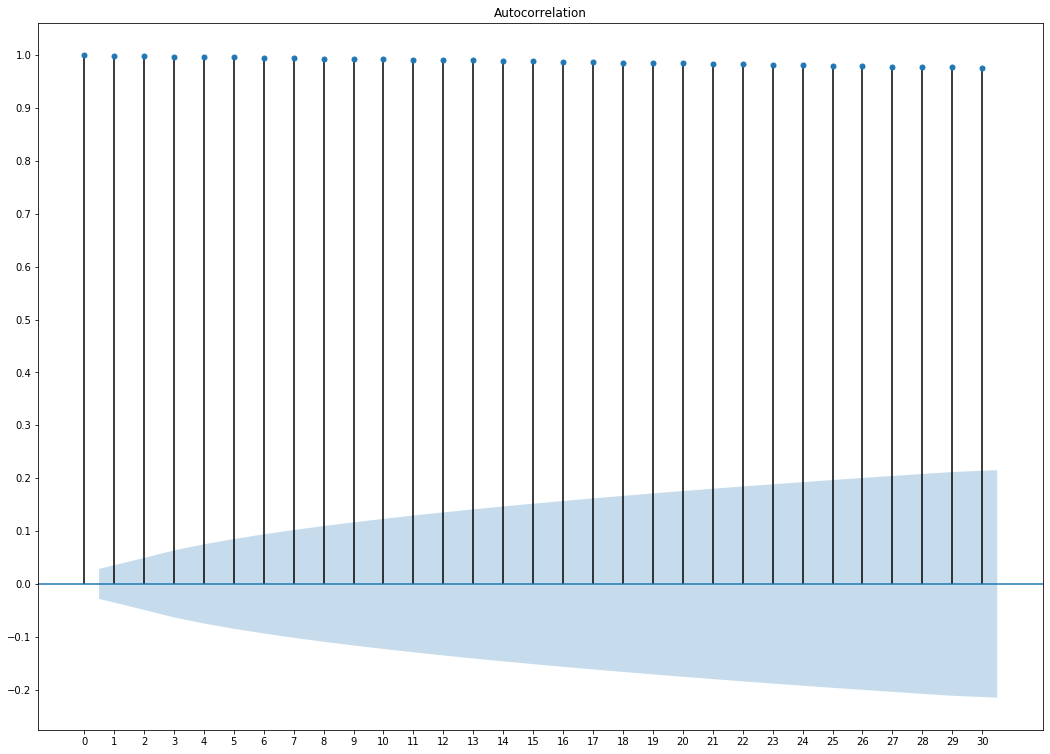

In [21]:
plt.rcParams['figure.figsize'] = [18,13]
acf = tsaplots.plot_acf(p,lags=30)
plt.yticks(np.arange(-.2, 1.1, step=0.1))
plt.xticks(np.arange(0, 31, step=1))
plt.show()

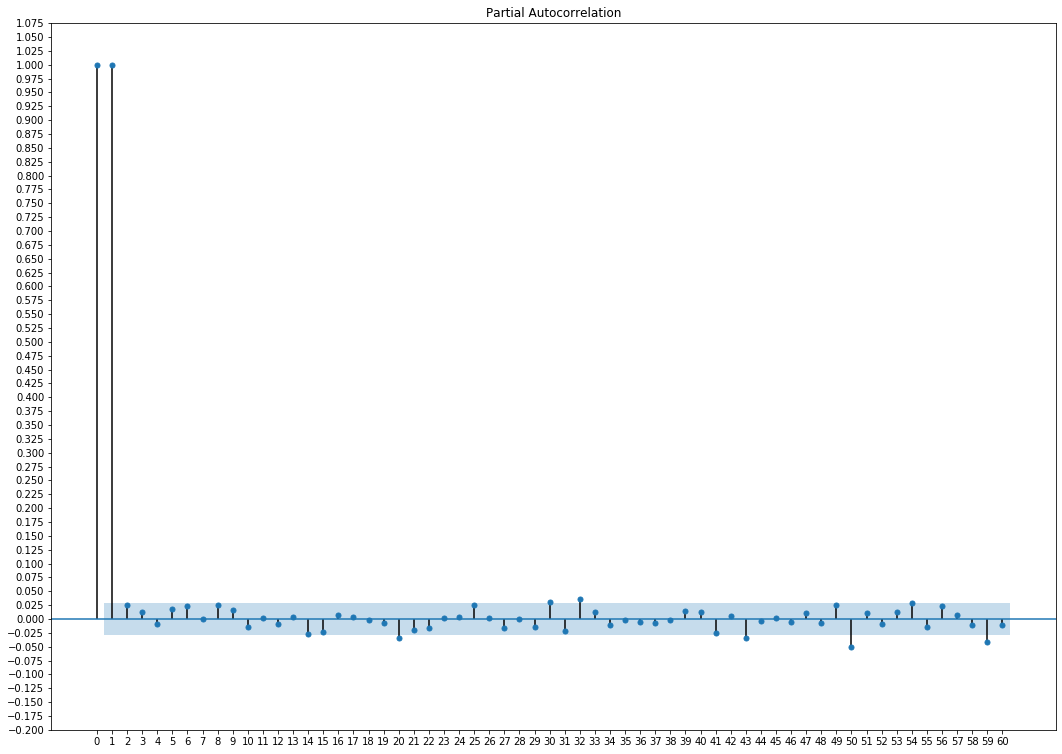

In [22]:
plt.rcParams['figure.figsize'] = [18,13]
pacf1 = tsaplots.plot_pacf(p,lags=60)

plt.yticks(np.arange(-.2, 1.1, step=0.025))
plt.xticks(np.arange(0, 61, step=1))
plt.show()

In [23]:
pac1 = tsaplots.pacf(p,nlags=60)
pac1[pac1 >= .025]

array([1.        , 0.99936286, 0.02530733, 0.02545847, 0.03058057,
       0.0363891 , 0.02544081, 0.02799658])

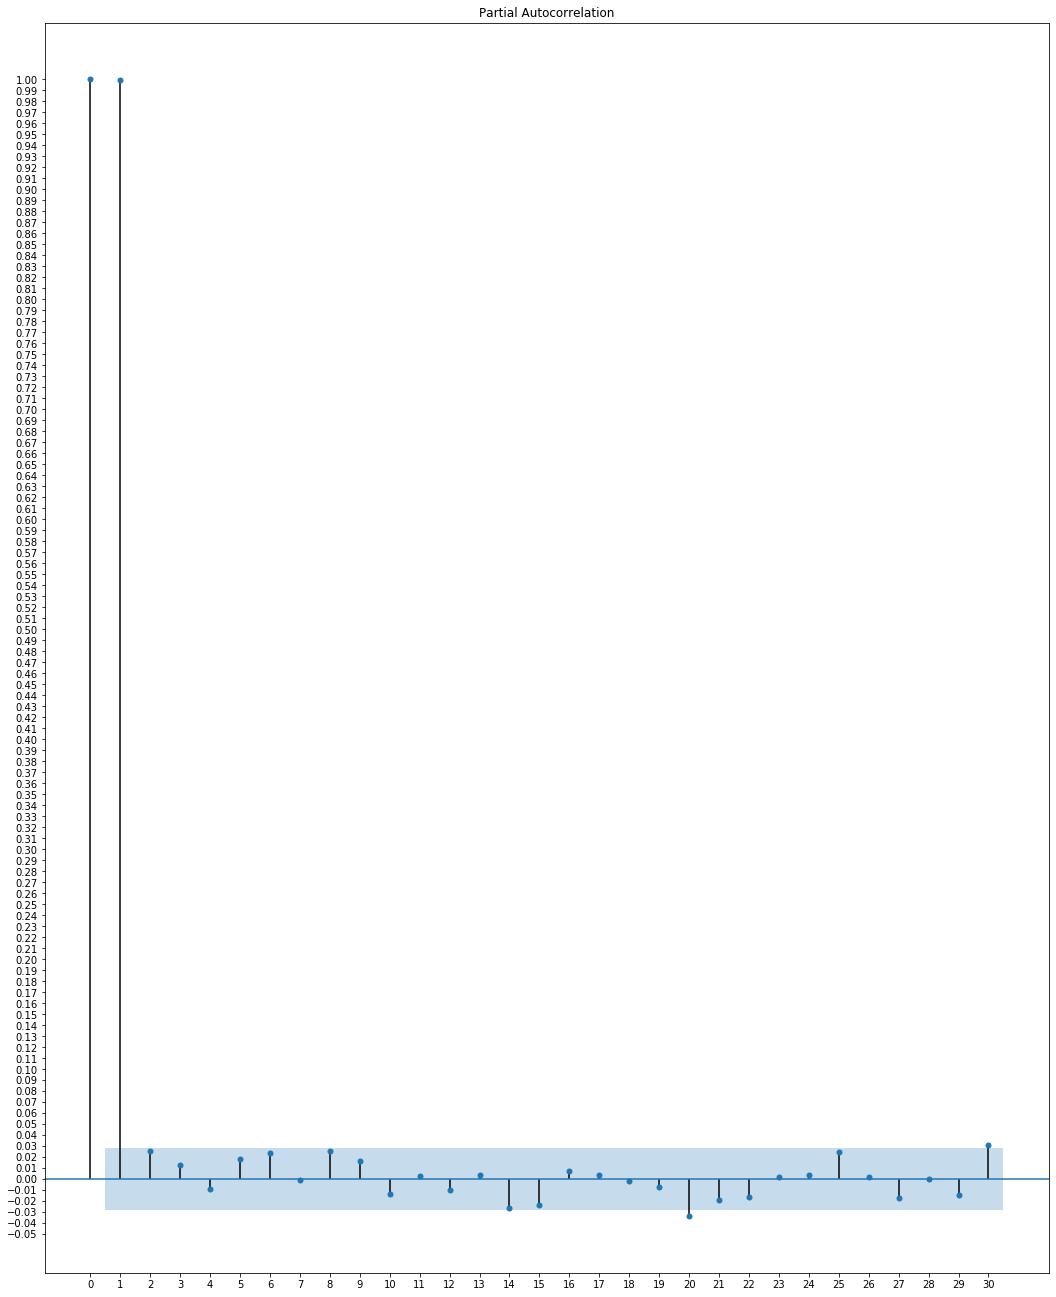

In [24]:
plt.rcParams['figure.figsize'] = [18,23]
pacf2= tsaplots.plot_pacf(p,lags=30)

plt.yticks(np.arange(-.05, 1.01, step=0.01))
plt.xticks(np.arange(0, 31, step=1))
plt.show()

In [25]:
pac2 = tsaplots.pacf(p,nlags=30)
pac2[pac2 >= .025]

array([1.        , 0.99936286, 0.02530733, 0.02545847, 0.03058057])

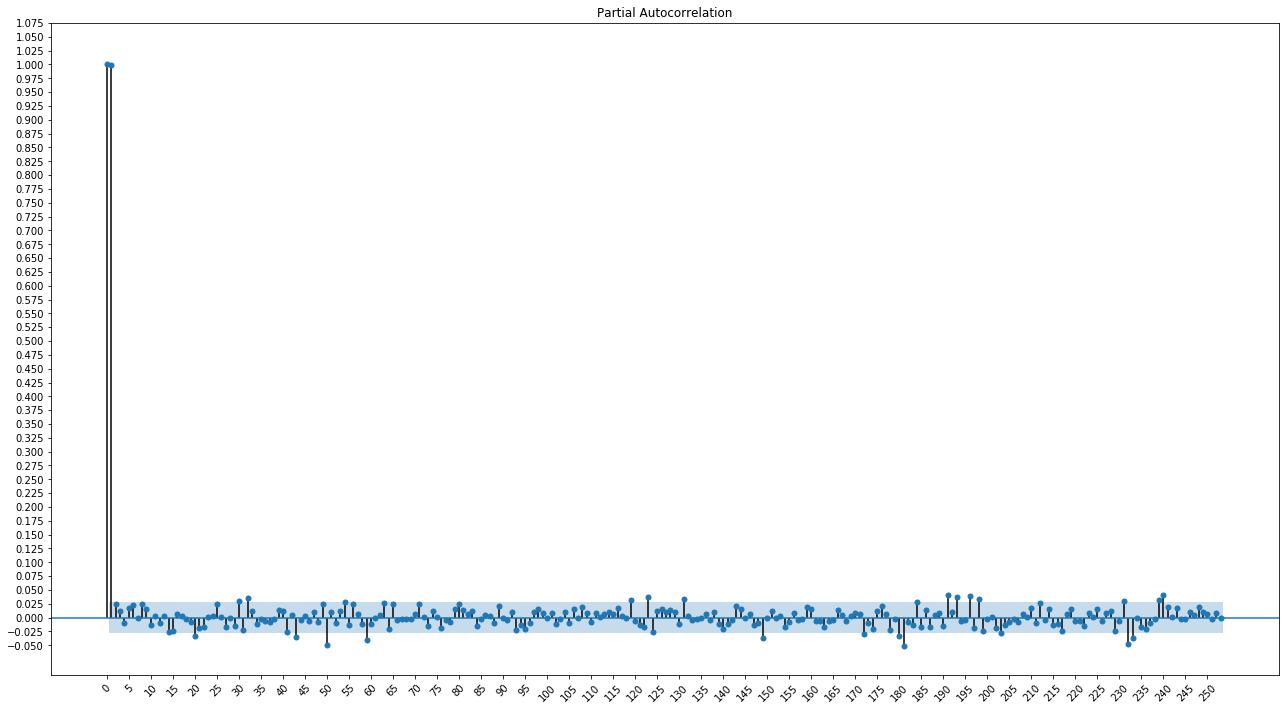

In [28]:
plt.rcParams['figure.figsize'] = [22,12]

pacf3 = tsaplots.plot_pacf(p,lags=253)
plt.yticks(np.arange(-.05, 1.1, step=0.025))
plt.xticks(np.arange(0, 253, step=5),rotation='45')
plt.show()

In [19]:
pac3 = tsaplots.pacf(p,nlags=253)
pac3[pac3 >= .025]

array([1.        , 0.99936286, 0.02530733, 0.02545847, 0.03058057,
       0.0363891 , 0.02544081, 0.02799658, 0.02589371, 0.02553665,
       0.0319323 , 0.03724472, 0.03457644, 0.02804746, 0.04060816,
       0.03762128, 0.03844188, 0.0340846 , 0.02565509, 0.03014416,
       0.03143875, 0.04019484])